#

# Autoregressive model of Order 1 & 2 with 500 time series per class

Time series images shape: (1000, 308, 620, 4)


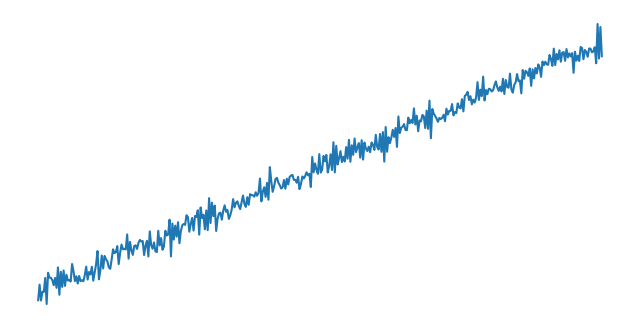

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(1234)  # For reproducibility

n_series = 500   # Number of time series per class
n_points = 400    # Number of data points in each time series
time_series_images = []

def generate_ar_data(order, n_points, trend_strength=0.1, seasonality_amplitude=0.5, seasonality_period=50):
    # Generate AR coefficients
    ar_params = np.random.uniform(-0.5, 0.5, size=order)
    ar = np.r_[1, -ar_params]  # Statsmodels requires the first element to be 1

    # Generate AR process with statsmodels
    ar_process = sm.tsa.ArmaProcess(ar, np.array([1]))
    data = ar_process.generate_sample(nsample=n_points)

    # Add trend and seasonality
    trend = np.linspace(0, trend_strength * n_points, n_points)
    seasonality = seasonality_amplitude * np.sin(2 * np.pi * np.arange(n_points) / seasonality_period)
    data += trend + seasonality

    return data

# Generate and save the plots
for order in range(1, 3):  # AR orders from 1 to 5
    for i in range(n_series):
        data = generate_ar_data(order, n_points)

        # Plotting the time series
        plt.figure(figsize=(8, 4))
        plt.plot(data)
        plt.axis('off')  # Turn off axes for a clean image
        plt.savefig(f'AR_{order}_Series_{i+1}.png', bbox_inches='tight', pad_inches=0)
        plt.close()

        # Load and store the image
        image = plt.imread(f'AR_{order}_Series_{i+1}.png')
        time_series_images.append(image)

# Convert the list of images into a numpy array
time_series_images = np.array(time_series_images)

# Display the shape of the time series images array
print("Time series images shape:", time_series_images.shape)

import random
 
# Randomly select a figure from the time_series_images array
random_figure = random.choice(time_series_images)
 
# Display the random figure
plt.figure(figsize=(8, 4))
plt.imshow(random_figure)
plt.axis('off')
plt.show()

Time series images shape: (1000, 308, 620, 4)


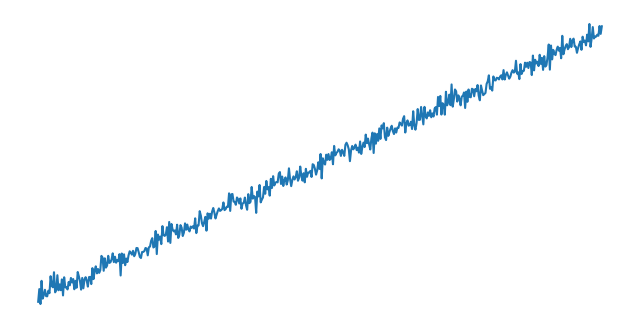

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

np.random.seed(1234)  # For reproducibility

# Set directory path
output_dir = "/Users/morenogallo/Desktop/ZHAW/7_semester/DS_Project/images"
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

n_series = 500   # Number of time series per class
n_points = 500    # Number of data points in each time series
time_series_images = []

def generate_ar_data(order, n_points, trend_strength=0.1, seasonality_amplitude=0.5, seasonality_period=50):
    # Generate AR coefficients
    ar_params = np.random.uniform(-0.5, 0.5, size=order)
    ar = np.r_[1, -ar_params]  # Statsmodels requires the first element to be 1

    # Generate AR process with statsmodels
    ar_process = sm.tsa.ArmaProcess(ar, np.array([1]))
    data = ar_process.generate_sample(nsample=n_points)

    # Add trend and seasonality
    trend = np.linspace(0, trend_strength * n_points, n_points)
    seasonality = seasonality_amplitude * np.sin(2 * np.pi * np.arange(n_points) / seasonality_period)
    data += trend + seasonality

    return data

# Generate and save the plots
for order in range(1, 3):  # AR orders from 1 to 5
    for i in range(n_series):
        data = generate_ar_data(order, n_points)

        # Plotting the time series
        plt.figure(figsize=(8, 4))
        plt.plot(data)
        plt.axis('off')  # Turn off axes for a clean image

        # Save plot in specified directory
        filepath = os.path.join(output_dir, f'AR_{order}_Series_{i+1}.png')
        plt.savefig(filepath, bbox_inches='tight', pad_inches=0)
        plt.close()

        # Load and store the image
        image = plt.imread(filepath)
        time_series_images.append(image)

# Convert the list of images into a numpy array
time_series_images = np.array(time_series_images)

# Display the shape of the time series images array
print("Time series images shape:", time_series_images.shape)

import random
 
# Randomly select a figure from the time_series_images array
random_figure = random.choice(time_series_images)
 
# Display the random figure
plt.figure(figsize=(8, 4))
plt.imshow(random_figure)
plt.axis('off')
plt.show()


### ma: same as ar: also 1000/500 und 1,3 (evtl oberen code nehmen und alles von ar auf ma anpassen?)
### arma 0-3 considering trend and season
### ar jetzt oben gemacht, erweitern auf 1000/500 mit 1,3

### alle plots speichern

### diese dann splitten, trainieren von eigenständigem modell (), zweites eigenständiges modell